In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data.isnull().sum()

In [ ]:
test_data.isnull().sum()

In [ ]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)

In [ ]:
test_data["Age"].fillna(train_data["Age"].median(), inplace=True)

In [ ]:
# Fill missing Fare
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

# Fill missing Embarked
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

In [ ]:
#converting categorical varoiables
train_data=pd.get_dummies(train_data,columns=['Sex','Embarked'],drop_first=True)
test_data=pd.get_dummies(test_data,columns=['Sex','Embarked'],drop_first=True)

In [ ]:
train_data.columns


In [ ]:
features=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  'Sex_male', 'Embarked_Q', 'Embarked_S']
X=train_data[features]
y=train_data['Survived']
X_test = test_data[features]

In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(X, y)

RandomForestClassifier(max_depth=10, random_state=42)

In [49]:
predictions = model.predict(X_test)
#print(predictions)

In [54]:
output = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

output.to_csv("submission.csv", index=False)
print("Submission file created!")


Submission file created!


In [50]:
from sklearn.model_selection import train_test_split

# Split the training data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

val_predictions = model.predict(X_val)

# Accuracy
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))

# Detailed performance
print("\nClassification Report:\n", classification_report(y_val, val_predictions))


Validation Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



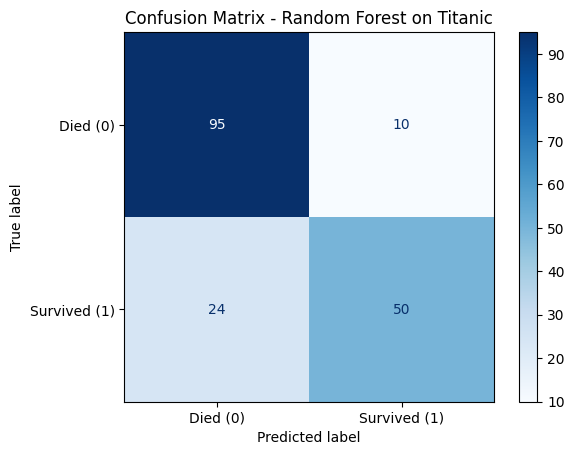

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, val_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died (0)", "Survived (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest on Titanic")
plt.show()



## WE HAVE SUCCESSFULLY DONE !
## NOW WE CAN LOOK FOR ADVANCED TUNING FOR BETTER RESULTS

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy: 0.8305504990270542


In [47]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X, y)

print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)


Best parameters: {'n_estimators': 300, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 7}
Best accuracy: 0.827185989580064


## NOTE: after submission, oit is found that the score is decreasing only on test data, therefore , revert back max_depth=7, and n_estimators=100 for best results--this file is being saved just to show , how hyperparameters tuning is done.